Bibliotecas necessárias

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt 
import numpy as np

# OpenCV II

---

## Histograma

---



Então, o que é histograma? Você pode considerar o histograma como um gráfico ou plotagem, que fornece uma ideia geral sobre a distribuição de intensidade de uma imagem. É um gráfico com valores de pixel (variando de 0 a 255, nem sempre) no eixo X e o número correspondente de pixels na imagem no eixo Y. 

É apenas outra maneira de entender a imagem. Ao olhar para o histograma de uma imagem, você obtém intuição sobre contraste, brilho, distribuição de intensidade etc. dessa imagem.

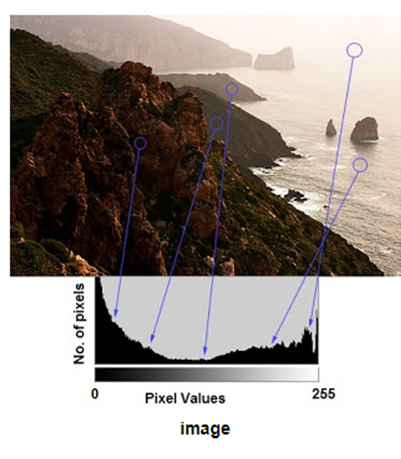

Podemos fazer um histograma somente da imagem em escala de cinza.

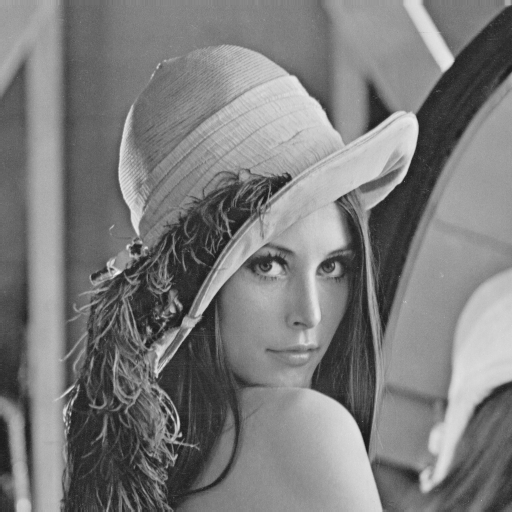

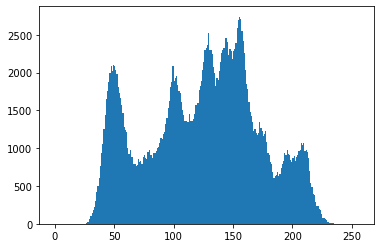

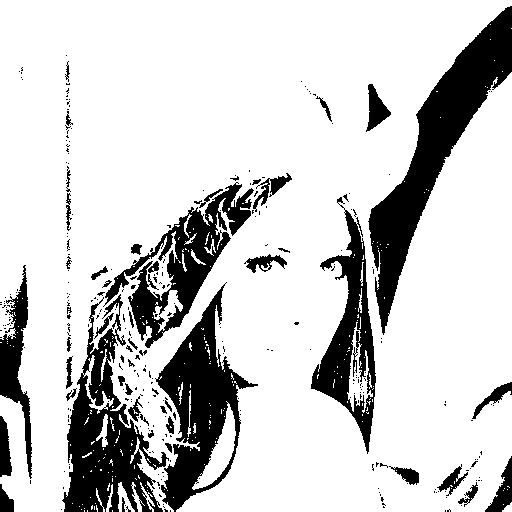

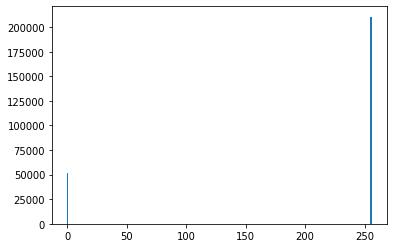

In [ ]:
img = cv.imread('lenna.png')
img_cinza = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
pixels = img_cinza.ravel()

cv2_imshow(img_cinza) 
plt.hist(pixels,256,[0,256]);
plt.show()

limiar = 75
img_cinza[img_cinza < limiar] = 0
img_cinza[img_cinza >= limiar] = 255
pixels = img_cinza.ravel()

cv2_imshow(img_cinza) 
plt.hist(pixels,256,[0,256]);
plt.show()

Mas também podemos fazer um histograma da imagem colorida.

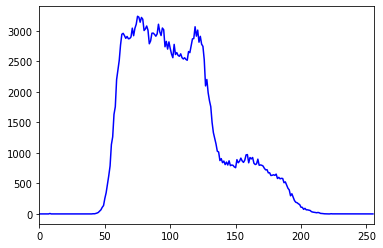

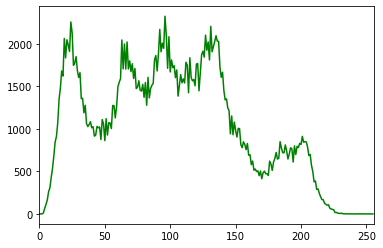

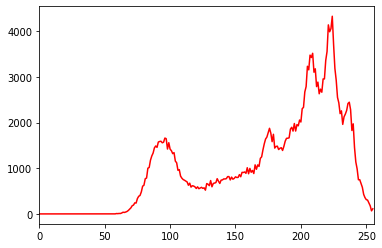

In [ ]:
img = cv.imread('lenna.png') 

#cv2_imshow(img) 
color = ('b','g','r') 
for i,col in enumerate(color): 
  histr = cv.calcHist([img],[i],None,[256],[0,256]) 
  plt.plot(histr,color = col) 
  plt.xlim([0,256]) 
  plt.show()

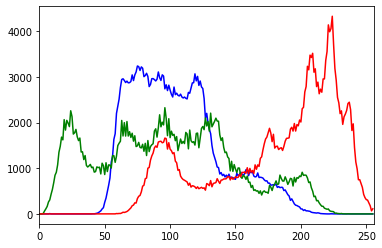

In [ ]:
img = cv.imread('lenna.png') 

#cv2_imshow(img) 
color = ('b','g','r') 
for i,col in enumerate(color): 
  histr = cv.calcHist([img],[i],None,[256],[0,256]) 
  plt.plot(histr,color = col) 
  plt.xlim([0,256]) 
plt.show()


## Limiarização

---



Para cada pixel, o mesmo valor limite é aplicado. Se o valor do pixel for menor que o limite, ele será definido como 0, caso contrário, será definido como um valor máximo.

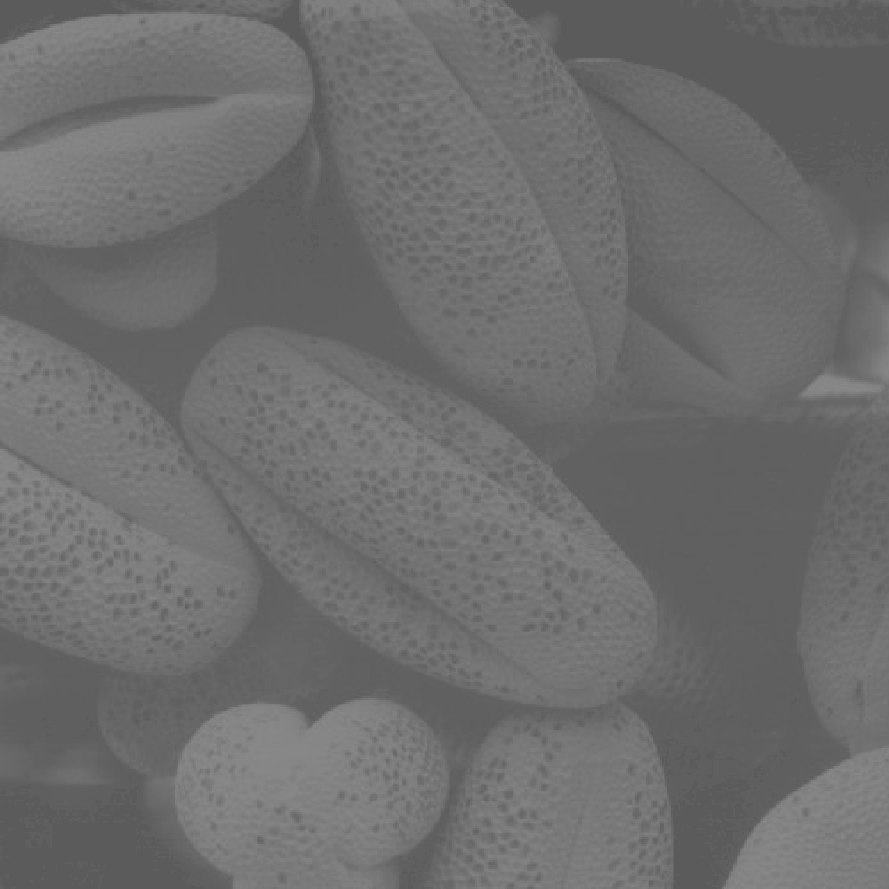

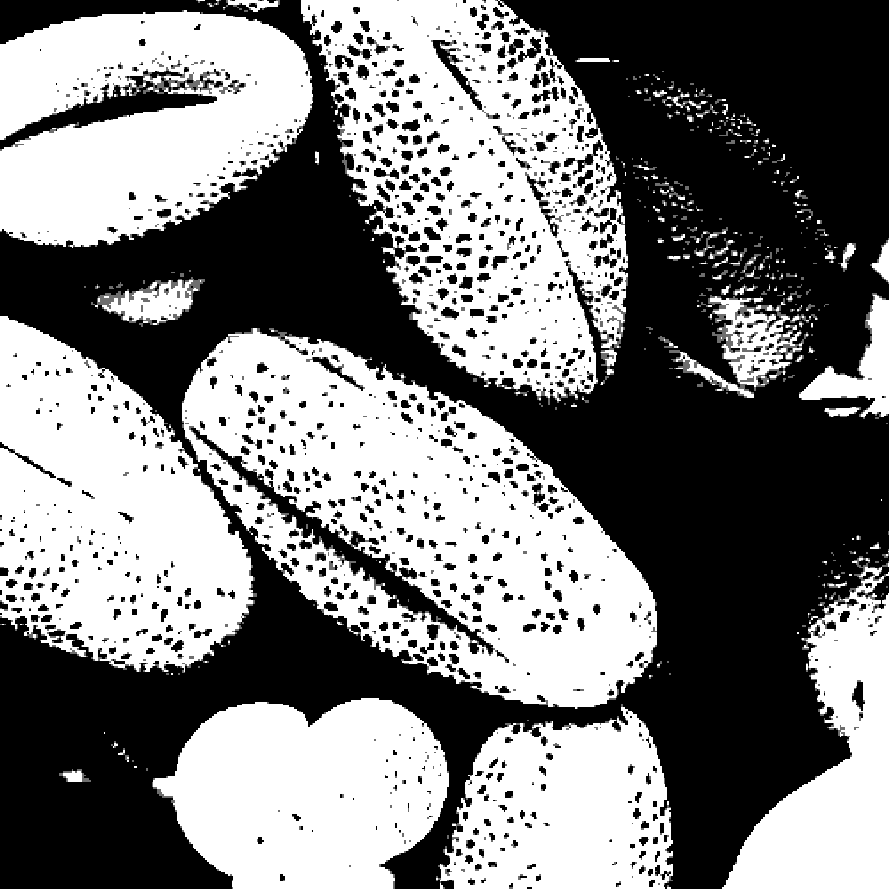

In [ ]:
img = cv.imread('polen.tif')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img)
limiar = 110

#for i in range(img.shape[0]):
#  for j in range(img.shape[1]):
#    if img[i, j] < limiar:
#      img[i, j] = 0
#    else:
#      img[i, j] = 255

img[img < limiar] = 0
img[img > limiar] = 255

cv2_imshow(img)

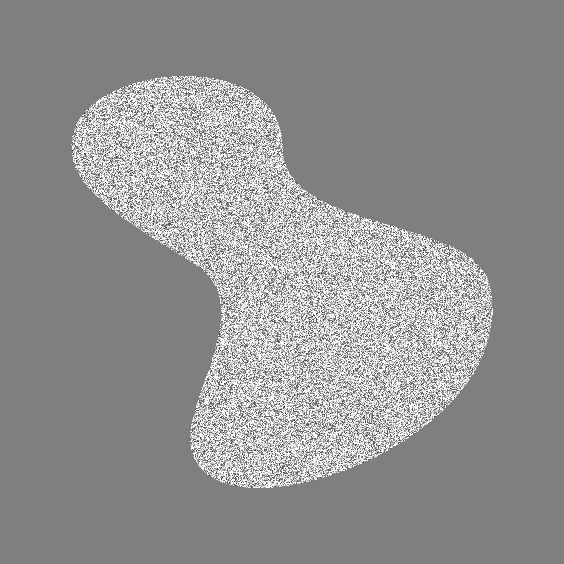

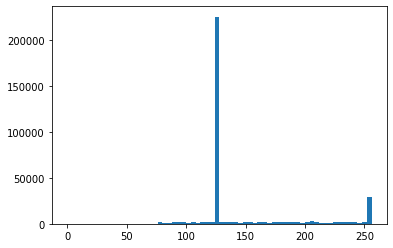

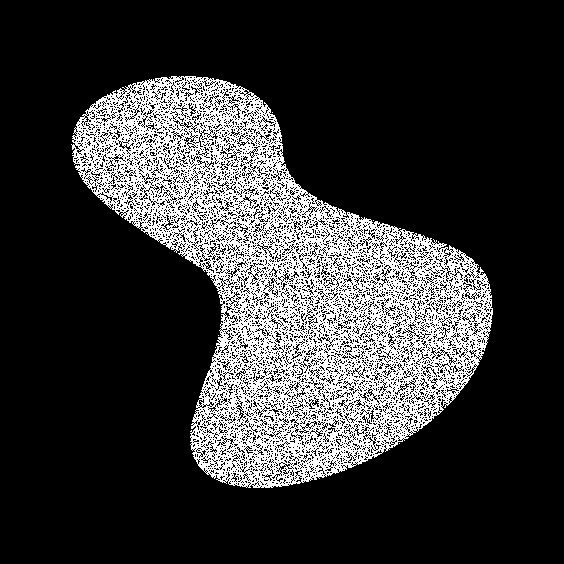

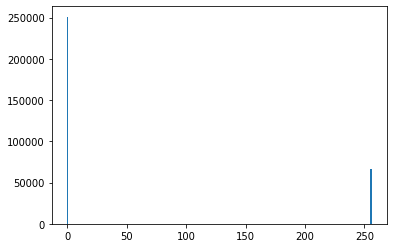

In [ ]:
img = cv.imread('limiarizacao.tif')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img)
limiar = 150

plt.hist(img.ravel(),64,[0,256]); 
plt.show()

img[img < limiar] = 0
img[img >= limiar] = 255

cv2_imshow(img)
plt.hist(img.ravel(),256,[0,256]); 
plt.show()

A função threshold é usada para aplicar o limiar. O primeiro argumento é a imagem de origem, que deve ser uma imagem em escala de cinza. O segundo argumento é o valor limite usado para classificar os valores de pixel. O terceiro argumento é o valor máximo atribuído aos valores de pixel que excedem o limite. O OpenCV fornece diferentes tipos de limiares, dados pelo quarto parâmetro da função. O limiar básico, é feito usando o tipo THRESH_BINARY. Todos os tipos de limiares simples são:

*   cv.THRESH_BINARY
*   cv.THRESH_BINARY_INV
*   cv.THRESH_TRUNC
*   cv.THRESH_TOZERO
*   cv.THRESH_TOZERO_INV


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


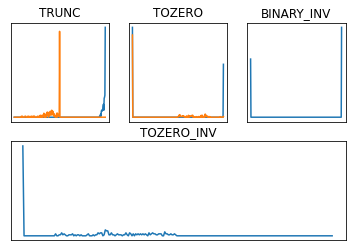

In [ ]:
img = cv.imread('limiar.jpg',0) 
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY) 
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV) 
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC) 
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO) 
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV) 
titulos = ['Imagem','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV'] 
imagens = [img, thresh1, thresh2, thresh3, thresh4, thresh5] 

"""
for i in range(6): 
  plt.subplot(2,3,i+1),plt.imshow(imagens[i],'gray') 
  plt.title(titulos[i]) 
  plt.xticks([]),plt.yticks([]) 
plt.show()
"""

histr = cv.calcHist(imagens[0],[0],None,[256],[0,256]) 
plt.subplot(2,3,1)
plt.plot(histr)
plt.xlim([-10, 266]) 
plt.title(titulos[0]) 
plt.xticks([]),plt.yticks([]) 

histr = cv.calcHist(imagens[1],[1],None,[256],[0,256]) 
plt.subplot(2,3,2)
plt.plot(histr)
plt.xlim([-10, 266]) 
plt.title(titulos[1]) 
plt.xticks([]),plt.yticks([]) 

histr = cv.calcHist(imagens[2],[2],None,[256],[0,256]) 
plt.subplot(2,3,3)
plt.plot(histr)
plt.xlim([-10, 266]) 
plt.title(titulos[2]) 
plt.xticks([]),plt.yticks([]) 

histr = cv.calcHist(imagens[3],[3],None,[256],[0,256]) 
plt.subplot(2,3,1)
plt.plot(histr)
plt.xlim([-10, 266]) 
plt.title(titulos[3]) 
plt.xticks([]),plt.yticks([]) 

histr = cv.calcHist(imagens[4],[4],None,[256],[0,256]) 
plt.subplot(2,3,2)
plt.plot(histr)
plt.xlim([-10, 266]) 
plt.title(titulos[4]) 
plt.xticks([]),plt.yticks([]) 

histr = cv.calcHist(imagens[5],[5],None,[256],[0,256]) 
plt.subplot(2,1,2)
plt.plot(histr)
plt.xlim([-10, 266]) 
plt.title(titulos[5]) 
plt.xticks([]),plt.yticks([]) 


plt.show()

Temos que tomar cuidado, pois o matplotlib equaliza o histograma.

In [ ]:
img = cv.imread('limiar.jpg',0) 
ret,thresh = cv.threshold(img,127,255,cv.THRESH_TRUNC)
cv2_imshow(thresh) 

### Limiar Adaptativo

---



Usamos um valor global como limite para o limiar simples. Mas isso pode não ser bom em todos os casos, por exemplo, se uma imagem tiver condições de iluminação diferentes em áreas diferentes. Nesse caso, o limiar adaptativo pode ajudar. Aqui, o algoritmo determina o limite para um pixel com base em uma pequena região ao seu redor. Portanto, obtemos limites diferentes para diferentes regiões da mesma imagem, o que fornece melhores resultados para imagens com iluminação variável. Além dos parâmetros do limiar simples, o método cv.adaptiveThreshold utiliza três parâmetros de entrada:

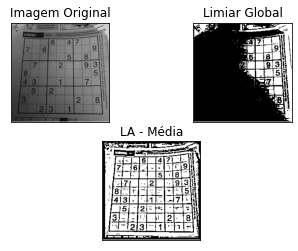

In [ ]:
img = cv.imread('limiar.jpg',0) 
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY) 
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2) 
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2) 
titulos = ['Imagem Original', 'Limiar Global', 'LA - Média', 'LA - Gaussian'] 
imagens = [img, th1, th2, th3] 


plt.subplot(2,2,1)
plt.imshow(imagens[0],'gray') 
plt.title(titulos[0]) 
plt.xticks([]),plt.yticks([]) 

plt.subplot(2,2,2)
plt.imshow(imagens[1],'gray') 
plt.title(titulos[1]) 
plt.xticks([]),plt.yticks([]) 

plt.subplot(2,1,2)
plt.imshow(imagens[2],'gray') 
plt.title(titulos[2]) 
plt.xticks([]),plt.yticks([]) 




plt.show()

## Suavização

---



O OpenCV fornece uma função cv.filter2D() para fazer a convolução de um kernel com uma imagem. Como exemplo, tentaremos um filtro de média em uma imagem. Um kernel de filtro com média de 5x5 será semelhante ao abaixo:

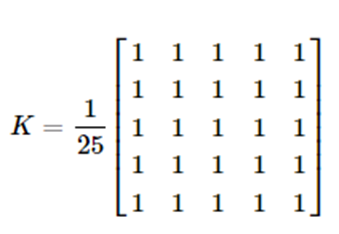

A suavização é uma forma de filtro bidimensional que procura “borrar” a imagem, eliminando ruídos, e também torna a região mais homogênea.

A operação com o kernel funciona assim: o centro do kernel se alinha acima de um pixel, todos os pixels que se alinham ao kernel são somados, a média é calculada e o pixel central é substituído pelo novo valor médio. Esta operação continua para todos os pixels da imagem.

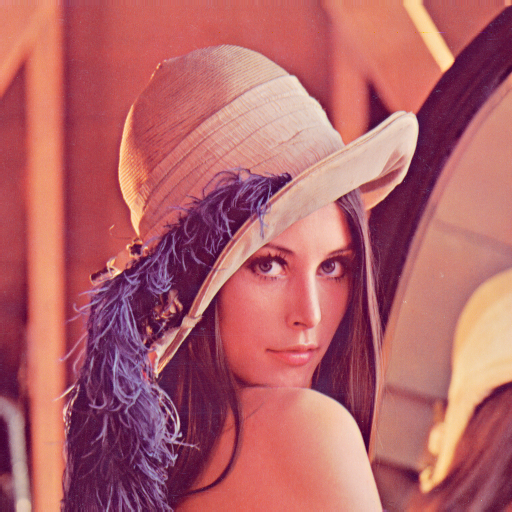

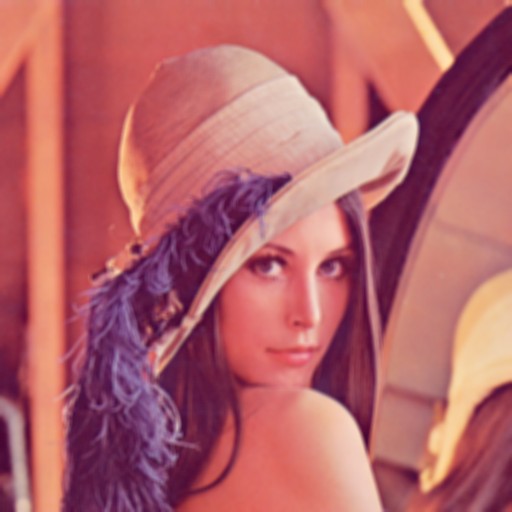

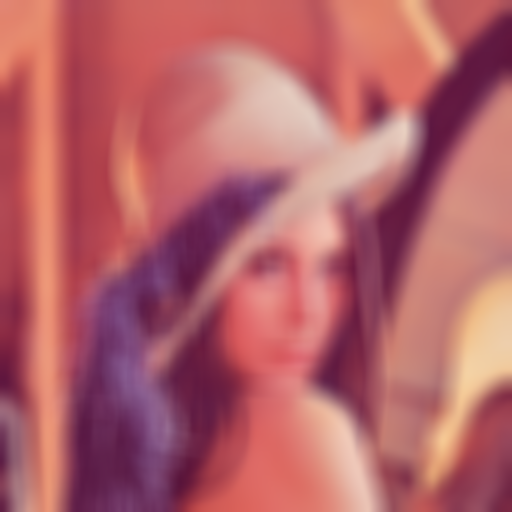

In [ ]:
img = cv.imread('lenna.png') 
kernel = np.ones((5,5))/25 
rst = cv.filter2D(img,-1,kernel)
kernel = np.ones((25,25))/(25*25) 
rst2 = cv.filter2D(img,-1,kernel) 
cv2_imshow(img) 
print("\n\n")
cv2_imshow(rst) 
print("\n\n")
cv2_imshow(rst2)

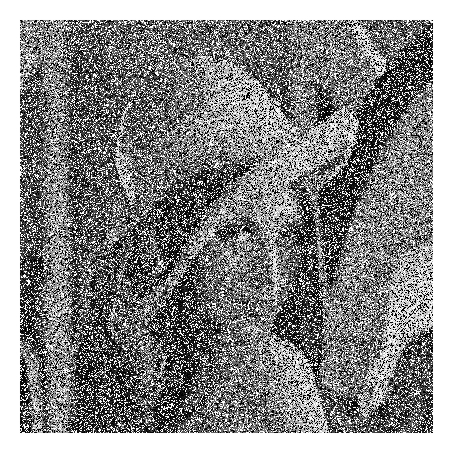

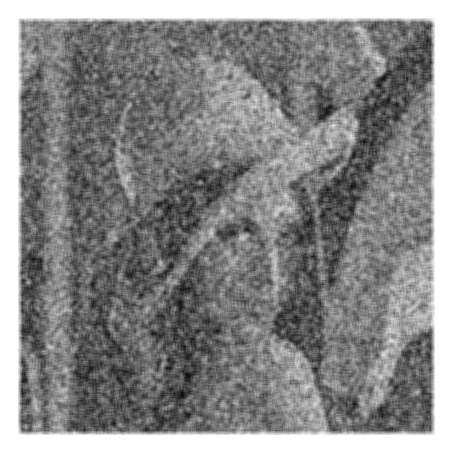

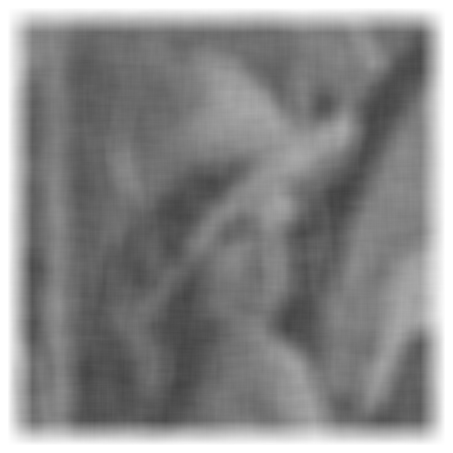

In [ ]:
img = cv.imread('lennaRuido.jpg') 
kernel = np.ones((5,5))/25 
rst = cv.filter2D(img,-1,kernel)
kernel = np.ones((25,25))/(25*25) 
rst2 = cv.filter2D(img,-1,kernel) 
cv2_imshow(img) 
print("\n\n")
cv2_imshow(rst) 
print("\n\n")
cv2_imshow(rst2) 

### Suavização por Média Aritmética

---



A média aritmética existe dentro do OpenCV como a função blur, sem a necessidade de chamar a numpy externamente.

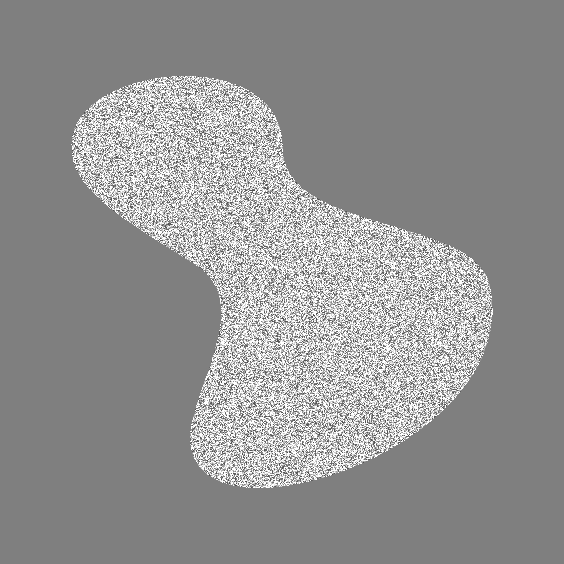

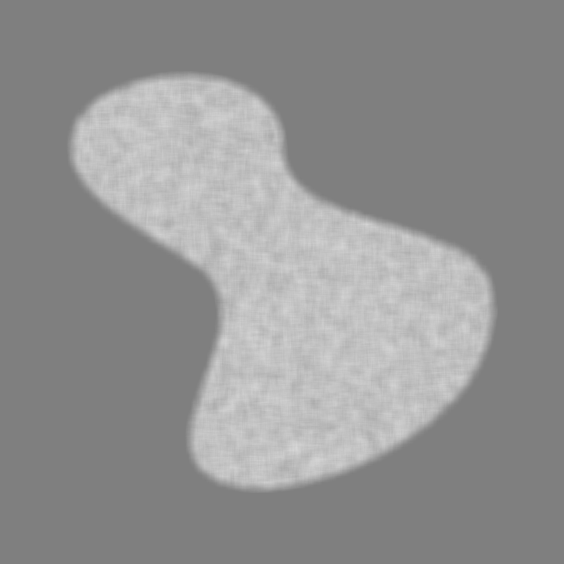

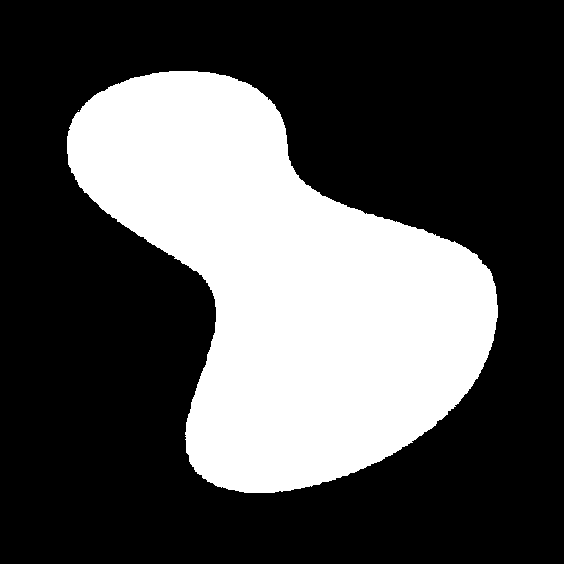

In [ ]:
img = cv.imread('limiarizacao.tif') 
rst = cv.blur(img,(11,11))
#rst = img.copy()
cv2_imshow(img)
cv2_imshow(rst) 
print("\n\n")

rst[rst < 130] = 0
rst[rst >= 130] = 255

cv2_imshow(rst)

### Suavização Gaussiana

---



Uma função de suavização muito utilizada, ela leva em conta a distribuição gaussiana(normal) para fazer a média, dando prioridade para os pixels centrais, afetando menos as bordas.

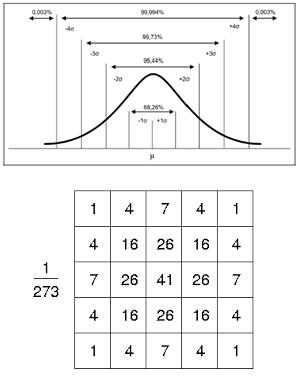

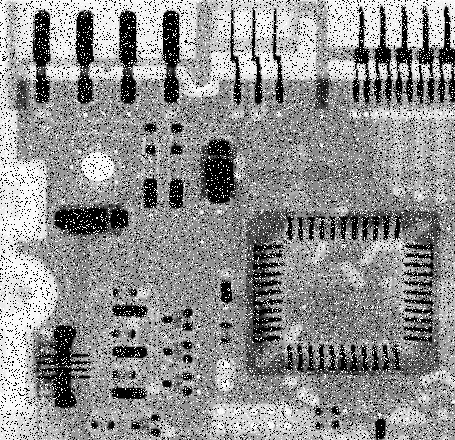

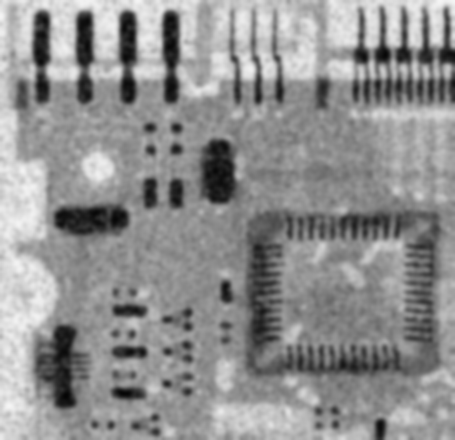

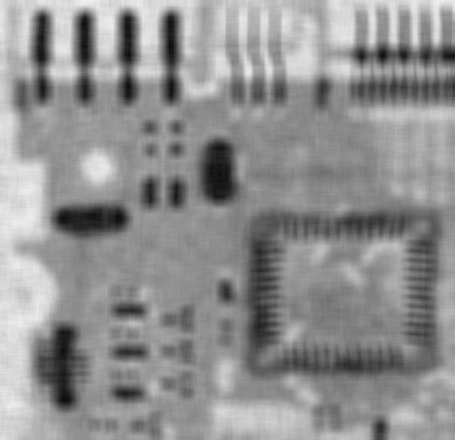

In [ ]:
img = cv.imread('placa.tif') 
rst = cv.GaussianBlur(img,(13,13), 0)
cv2_imshow(img) 
print("\n\n")
cv2_imshow(rst)

img = cv.imread('placa.tif') 
rst = cv.blur(img,(13,13))
print("\n\n")
cv2_imshow(rst)

### Suavização Mediana

---



Muito efetivo contra ruídos, principalmente os conhecidos como sal e pimenta, ele leva o conta a distribuição dos pixels do kernel e pega a mediana para representa-lo (o valor central do conjunto ordenado dos pixels).

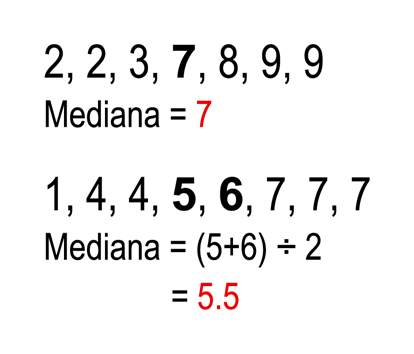

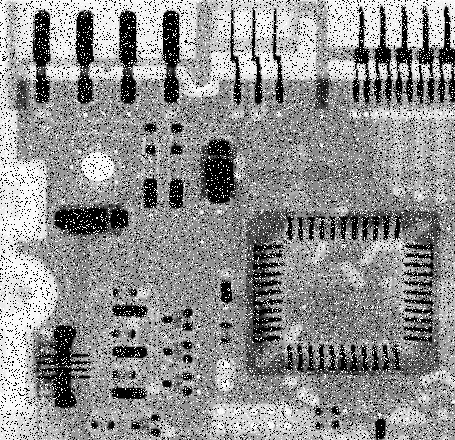

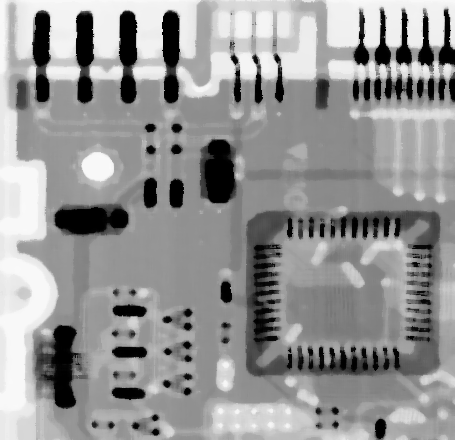

In [ ]:
img = cv.imread('placa.tif') 
rst = cv.medianBlur(img,7)
cv2_imshow(img) 
print("\n\n")
cv2_imshow(rst)

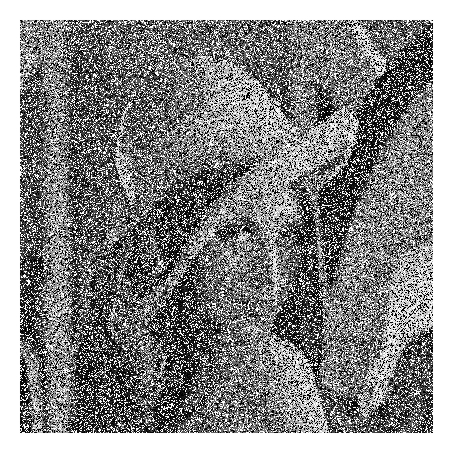

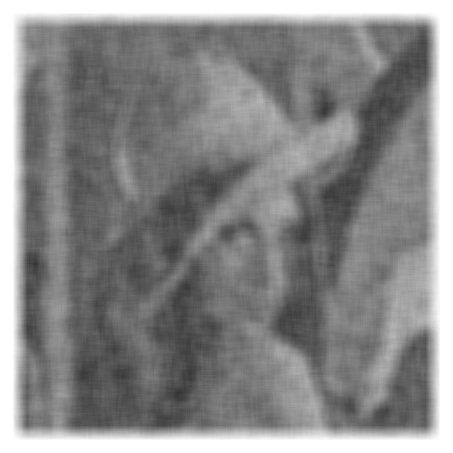

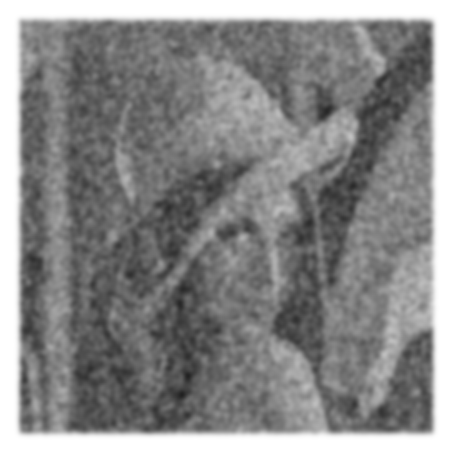

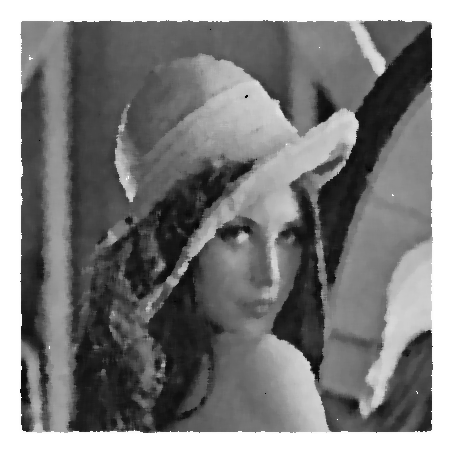

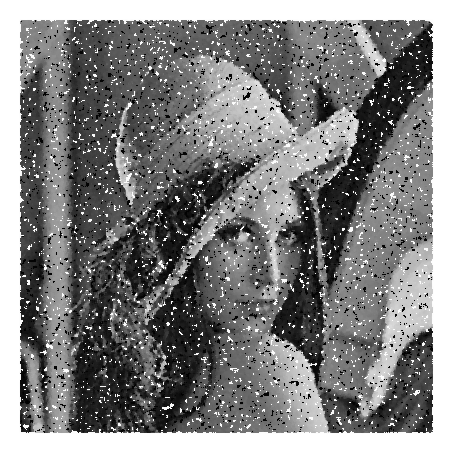

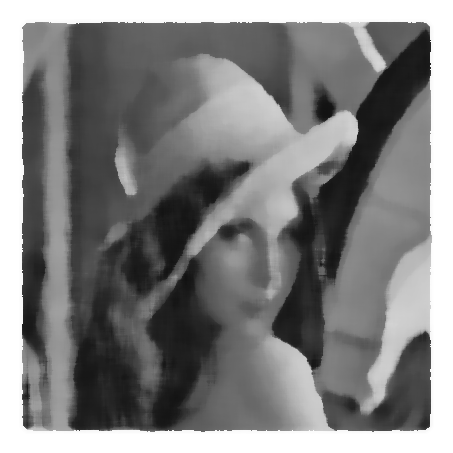

In [ ]:
img = cv.imread('lennaRuido.jpg') 
#rst = img.copy()
cv2_imshow(img)
rst = cv.blur(img,(15,15))
cv2_imshow(rst) 

rst = cv.GaussianBlur(img,(15,15), 0)
cv2_imshow(rst) 

rst = cv.medianBlur(img, 7)
cv2_imshow(rst) 
rst = cv.medianBlur(img, 3)
cv2_imshow(rst)
rst = cv.medianBlur(img, 15)
cv2_imshow(rst)

## Detecção de Bordas - Canny

---



O algoritmo de detecção de bordas por Canny pode ser dividido em 5 etapas diferentes: 

*   Aplicar o filtro gaussiano para suavizar a imagem, a fim de remover o ruído;
*   Encontrar os gradientes de intensidade da imagem (Robert, Sobel...);
*   Aplicar supressão de pontos não máximos;
*   Aplicar uma limiarização com dois limiares duplo;
*   Finalizar a detecção de bordas suprimindo todas as bordas fracas e não conectadas a bordas fortes.

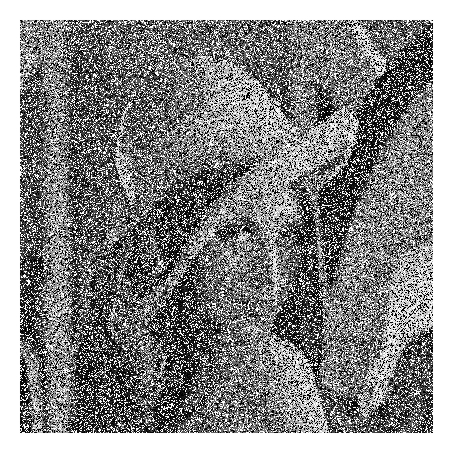

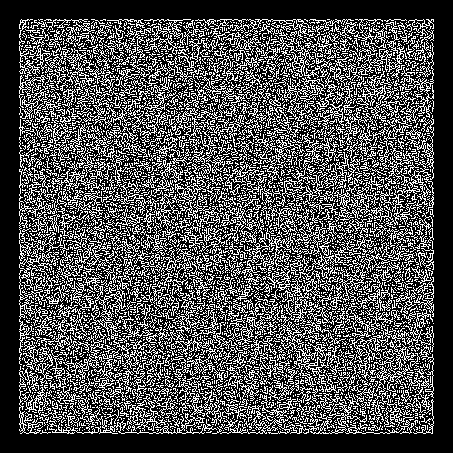

In [ ]:
img = cv.imread('lennaRuido.jpg') 
rst = cv.Canny(img,100,200)
cv2_imshow(img) 
print("\n\n")
cv2_imshow(rst)